<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [17]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [18]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [19]:
df.columns=df.columns.str.lower().str.strip()
df.head()

,sepallength,sepalwidth,petallength,petalwidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


In [20]:
df['species'].unique()

array(['setosa', ' virginica', 'VIRGINICA', 'virginica', 'virginica ',
       'versicolor', 'Versicolor', 'VERSICOLOR', nan, 'Setosa', 'SETOSA'],
      dtype=object)

In [21]:
df.loc[df['species'].isnull(),'species']='desconocida'

In [22]:
df['species'].unique()

array(['setosa', ' virginica', 'VIRGINICA', 'virginica', 'virginica ',
       'versicolor', 'Versicolor', 'VERSICOLOR', 'desconocida', 'Setosa',
       'SETOSA'], dtype=object)

In [23]:
df['species']=df['species'].str.lower().str.strip()
df['species'].unique()

array(['setosa', 'virginica', 'versicolor', 'desconocida'], dtype=object)

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

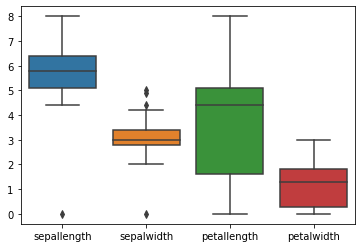

In [32]:
#se reemplazan los valores nulos de las columnas del largo y ancho de petalos y sépalos con un 0
df.loc[df['sepallength'].isnull(),'sepallength']=0
df.loc[df['sepalwidth'].isnull(),'sepalwidth']=0
df.loc[df['petallength'].isnull(),'petallength']=0
df.loc[df['petalwidth'].isnull(),'petalwidth']=0
length_and_width_df=df.drop(['species'],axis=1)
sns.boxplot(data=length_and_width_df)

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [25]:
df1=df
df1.loc[df1['sepallength']<4.0,'label']='sepallength'
df1.loc[df1['sepallength']>7.0,'label']='sepallength'
df1.loc[df1['sepalwidth']<2.0,'label']='sepalwidth'
df1.loc[df1['sepalwidth']>4.5,'label']='sepalwidth'
df1.loc[df1['petallength']<1.0,'label']='petallength'
df1.loc[df1['petallength']>7.0,'label']='petallength'
df1.loc[df1['petalwidth']<0.1,'label']='petallength'
df1.loc[df1['petalwidth']>2.5,'label']='petalwidth'
df1.head()

,sepallength,sepalwidth,petallength,petalwidth,species,label
0,4.4,3.2,1.3,3.0,setosa,petalwidth
1,7.2,3.6,6.1,2.5,virginica,sepallength
2,6.3,3.3,6.0,2.5,virginica,NaN
3,6.7,3.3,5.7,2.5,virginica,NaN
4,6.3,3.4,5.6,2.4,virginica,NaN


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

In [26]:
df2=df1
df2['label'].unique()

array(['petalwidth', 'sepallength', nan, 'sepalwidth', 'petallength'],
      dtype=object)

In [33]:
#'cumple' se refiere a los ejemplares que cumplen con las restricciones
df2.loc[df2['label'].isnull(),'label']='cumple'
df2['label'].unique()

array(['petalwidth', 'sepallength', 'cumple', 'sepalwidth', 'petallength'],
      dtype=object)

In [28]:
mask_label=df2['label']!='cumple'
df3=df2[mask_label]
df3.reset_index()

,index,sepallength,sepalwidth,petallength,petalwidth,species,label
0,0,4.4,3.2,1.3,3.0,setosa,petalwidth
1,1,7.2,3.6,6.1,2.5,virginica,sepallength
2,12,7.7,3.0,6.1,2.3,virginica,sepallength
3,14,7.7,2.6,6.9,2.3,virginica,sepallength
4,17,7.7,3.8,6.7,2.2,virginica,sepallength
5,18,7.6,3.0,6.6,2.1,virginica,sepallength
6,23,7.1,3.0,5.9,2.1,virginica,sepallength
7,27,7.7,2.8,6.7,2.0,virginica,sepallength
8,28,7.9,3.8,6.4,2.0,virginica,sepallength
9,34,7.4,2.8,6.1,1.9,virginica,sepallength


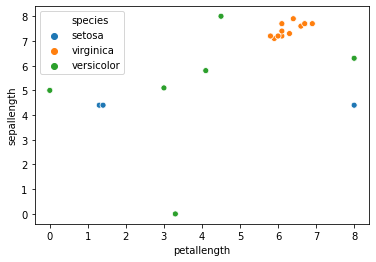

In [29]:
sns.scatterplot(
        x='petallength',
        y='sepallength',
        data=df3,
        hue='species',
)

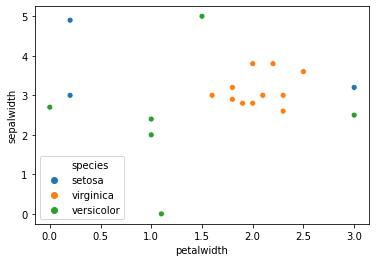

In [14]:
sns.scatterplot(
        x='petalwidth',
        y='sepalwidth',
        data=df3,
        hue='species',
)

En base a los gráficos anteriores y, es posible concluir que la especie "virginica" es la que tiene una mayor cantidad de ejemplares que no respetan las restricciones impuestas en el estudio y gracias al gráfico de caja y bigote se puede deducir que es la que tiene la distribución más homogénea. 

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

In [30]:
mask_label2= df2['label']=='cumple'
df4=df2[mask_label2]
df4

,sepallength,sepalwidth,petallength,petalwidth,species,label
2,6.3,3.3,6.0,2.5,virginica,cumple
3,6.7,3.3,5.7,2.5,virginica,cumple
4,6.3,3.4,5.6,2.4,virginica,cumple
5,6.7,3.1,5.6,2.4,virginica,cumple
6,5.8,2.8,5.1,2.4,virginica,cumple
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,cumple
146,4.8,3.0,1.4,0.1,setosa,cumple
147,4.9,3.1,1.5,0.1,setosa,cumple
148,4.9,3.6,1.4,0.1,setosa,cumple


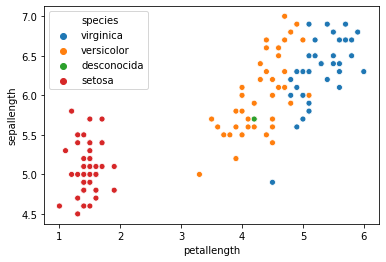

In [31]:
sns.scatterplot(
        x='petallength',
        y='sepallength',
        data=df4,
        hue='species',
)